In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Logos

In [18]:
lagosstate = pd.read_csv('lagosstate_rooftop_solar_potential.csv')

In [19]:
lagosstate.head(3)

,OBJECTID,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Estimated_Installation_Efficiency,Unit_installation_price,Date_added,aoi,Roof_quality,solar_panels,Comment
0,1,d57c9ad0-ab84-4a75-b42c-f0d68615e45d,LagosState,43.820000,22.990000,4.46,6226.520020,Single-family residential,0.00,NaN,1396.00,142.10,NaN,NaN,Badagry,medium,no,NaN
1,2,8ed6f0cc-ffb1-45d8-82ee-65e3db61b7c5,LagosState,25.020000,11.990000,2.33,2968.560059,Single-family residential,27.99,NaN,1276.00,118.65,NaN,NaN,Badagry,low,no,NaN
2,3,aff7ffb4-4b5b-44f4-be92-7613d71413be,LagosState,46.040001,24.469999,4.75,6177.589844,Single-family residential,20.52,NaN,1301.52,134.19,NaN,NaN,Badagry,low,no,NaN


In [20]:
lagosstate.columns

Index(['OBJECTID', 'uuid', 'City', 'Surface_area',
       'Potential_installable_area', 'Peak_installable_capacity',
       'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt',
       'Estimated_building_height', 'Estimated_capacity_factor',
       'Estimated_Installation_Efficiency', 'Unit_installation_price',
       'Date_added', 'aoi', 'Roof_quality', 'solar_panels', 'Comment'],
      dtype='object')

As uuid and comment is not make sensor our taget, they will be removed

In [21]:
lagosstate.drop(columns=['uuid','Comment'],axis = 1,inplace=True)

In [22]:
lagosstate.columns

Index(['OBJECTID', 'City', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Estimated_Installation_Efficiency',
       'Unit_installation_price', 'Date_added', 'aoi', 'Roof_quality',
       'solar_panels'],
      dtype='object')

In [23]:
lagosstate.head(1)

,OBJECTID,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Estimated_Installation_Efficiency,Unit_installation_price,Date_added,aoi,Roof_quality,solar_panels
0,1,LagosState,43.82,22.99,4.46,6226.52002,Single-family residential,0.0,NaN,1396.0,142.1,NaN,NaN,Badagry,medium,no


In [24]:
lagosstate['City'].value_counts()

City
LagosState    1329525
Lagos          212532
Name: count, dtype: int64

Drop 'City' for EDA

In [25]:
lagosstate.drop(columns='City',axis=1,inplace=True)

In [26]:
lagosstate.head(1)

,OBJECTID,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Estimated_Installation_Efficiency,Unit_installation_price,Date_added,aoi,Roof_quality,solar_panels
0,1,43.82,22.99,4.46,6226.52002,Single-family residential,0.0,NaN,1396.0,142.1,NaN,NaN,Badagry,medium,no


In [27]:
lagosstate.shape

(1542057, 15)

In [28]:
lagosstate.dtypes

OBJECTID                               int64
Surface_area                         float64
Potential_installable_area           float64
Peak_installable_capacity            float64
Energy_potential_per_year            float64
Assumed_building_type                 object
Estimated_tilt                       float64
Estimated_building_height            float64
Estimated_capacity_factor            float64
Estimated_Installation_Efficiency    float64
Unit_installation_price              float64
Date_added                           float64
aoi                                   object
Roof_quality                          object
solar_panels                          object
dtype: object

Considering Common Columns

In [29]:
common_columns = [
    "City",
    "Surface_area",
    "Potential_installable_area",
    "Peak_installable_capacity",
    "Energy_potential_per_year",
    "Assumed_building_type",
    "Estimated_tilt",
    "Estimated_building_height",
    "Estimated_capacity_factor"
]

In [30]:
lagosstate = lagosstate[['Surface_area','Potential_installable_area','Peak_installable_capacity','Energy_potential_per_year','Assumed_building_type','Estimated_tilt','Estimated_building_height','Estimated_capacity_factor']]

In [31]:
num_col = lagosstate.select_dtypes(include=['int64', 'float64'])

cat_col = lagosstate.select_dtypes(exclude=['int64', 'float64'])

num_col.columns, cat_col.columns

(Index(['Surface_area', 'Potential_installable_area',
        'Peak_installable_capacity', 'Energy_potential_per_year',
        'Estimated_tilt', 'Estimated_building_height',
        'Estimated_capacity_factor'],
       dtype='object'),
 Index(['Assumed_building_type'], dtype='object'))

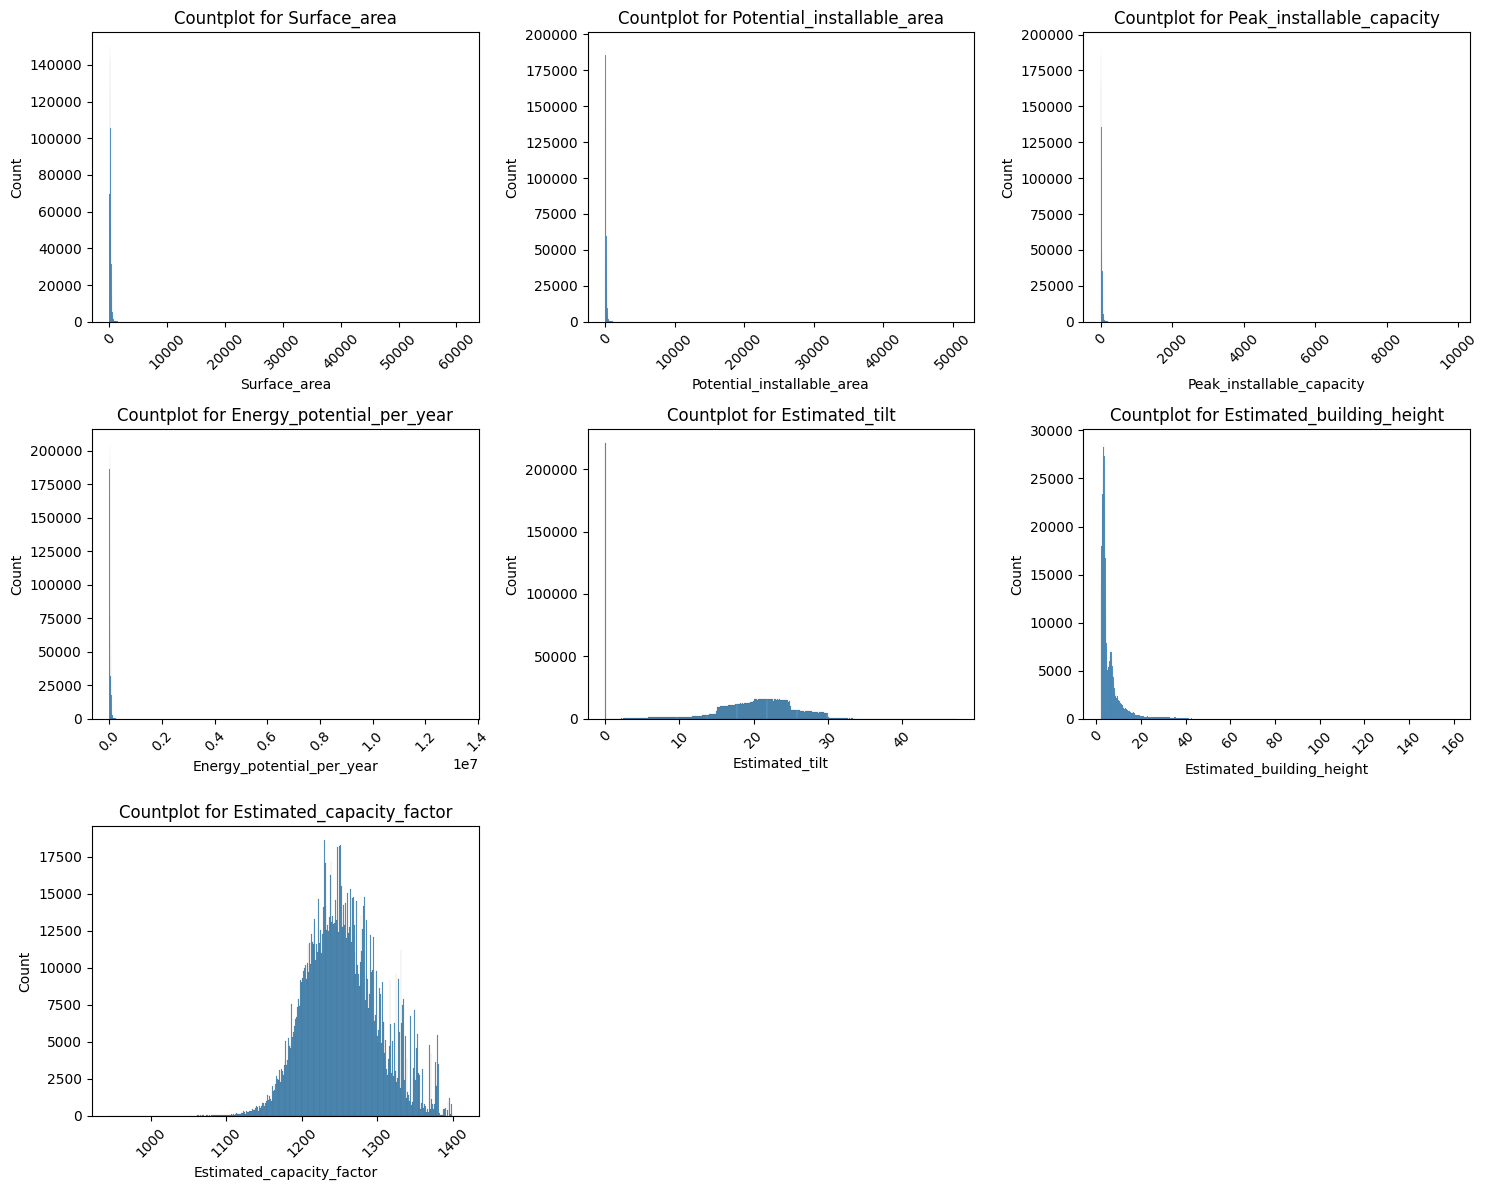

In [32]:
# Number of categorical columns
num_cols = len(num_col.columns)

# Set up the subplot grid dimensions
rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Customize the size as needed
axes = axes.flatten()  # Flatten to iterate over axes easily

# Iterate through the categorical columns and plot countplots
for i, col in enumerate(num_col.columns):
    sns.histplot(x=lagosstate[col], ax=axes[i])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

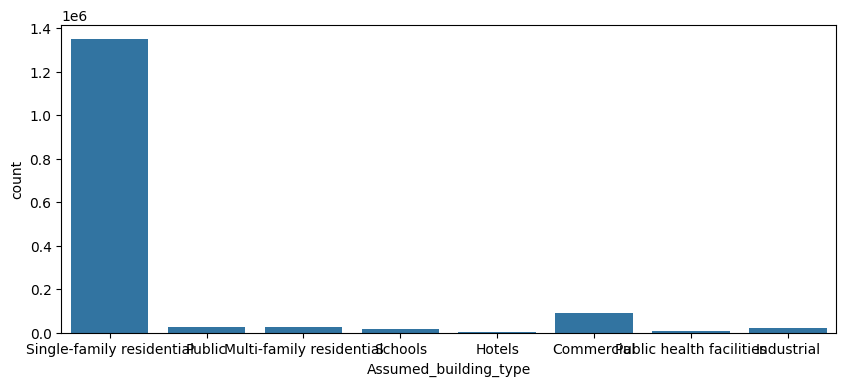

In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(data=lagosstate, x='Assumed_building_type')
plt.show()

BoxPlot

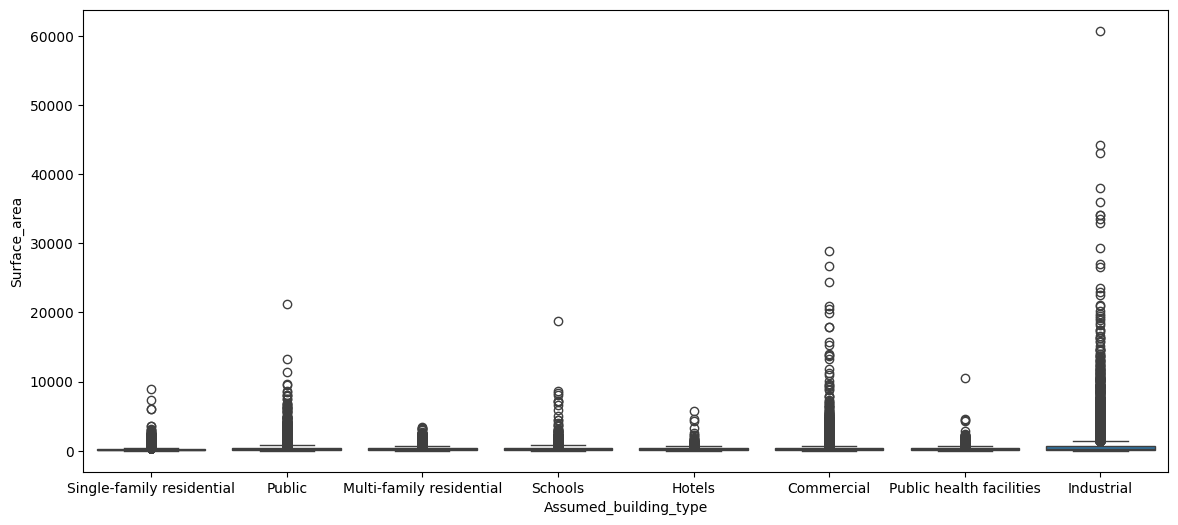

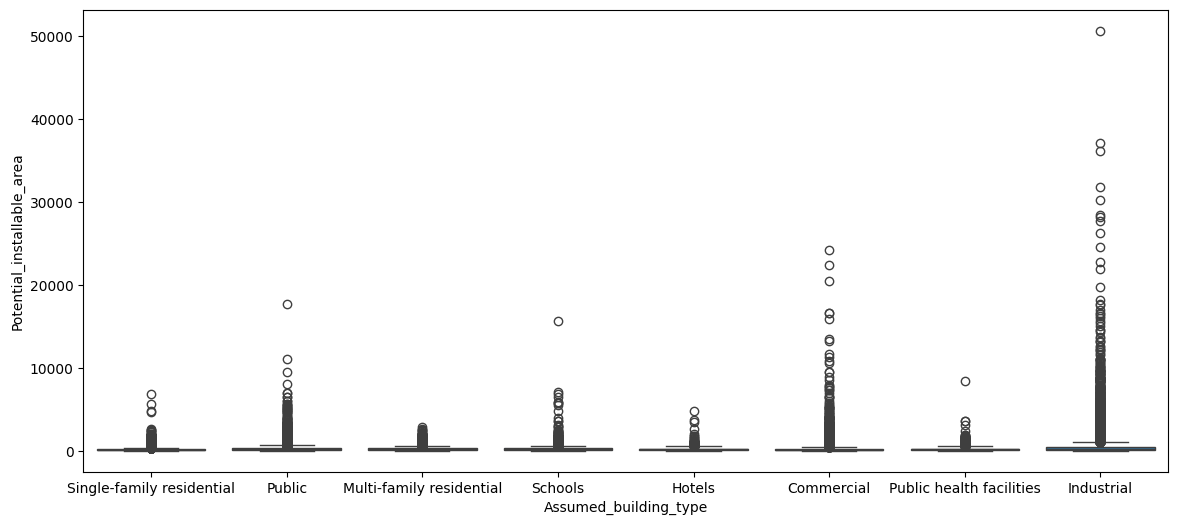

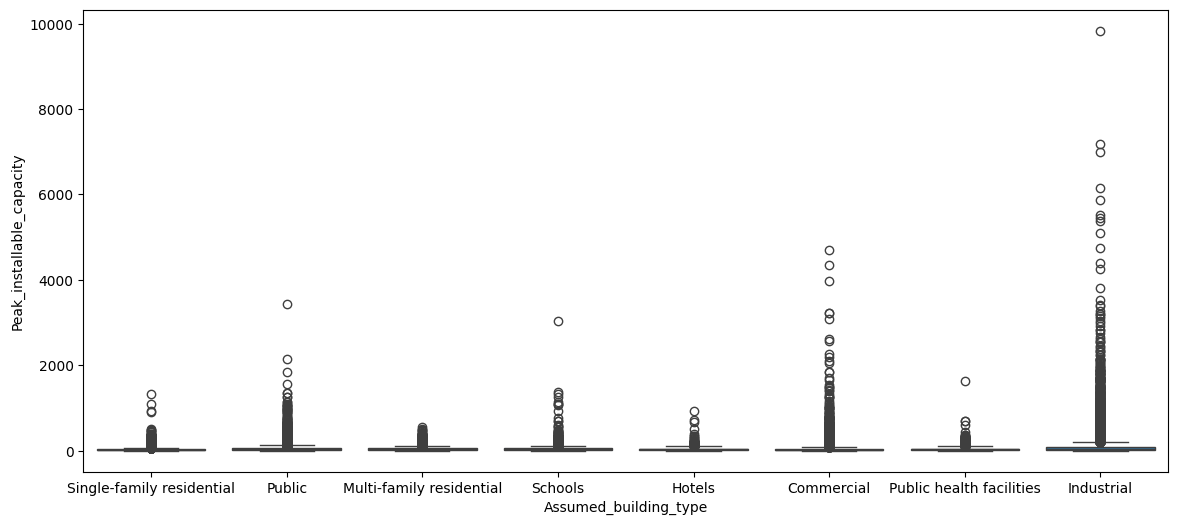

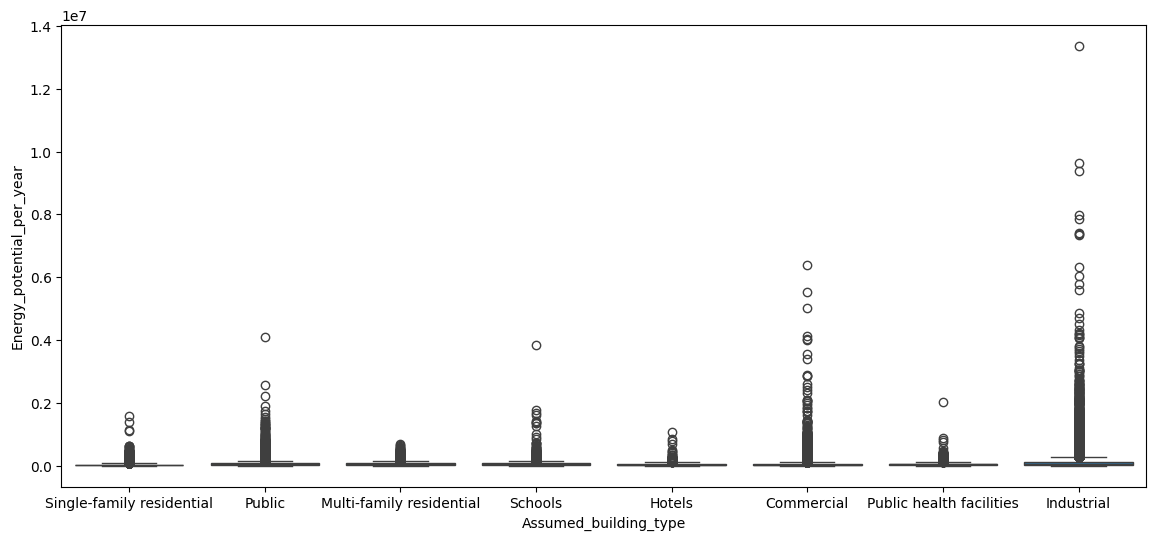

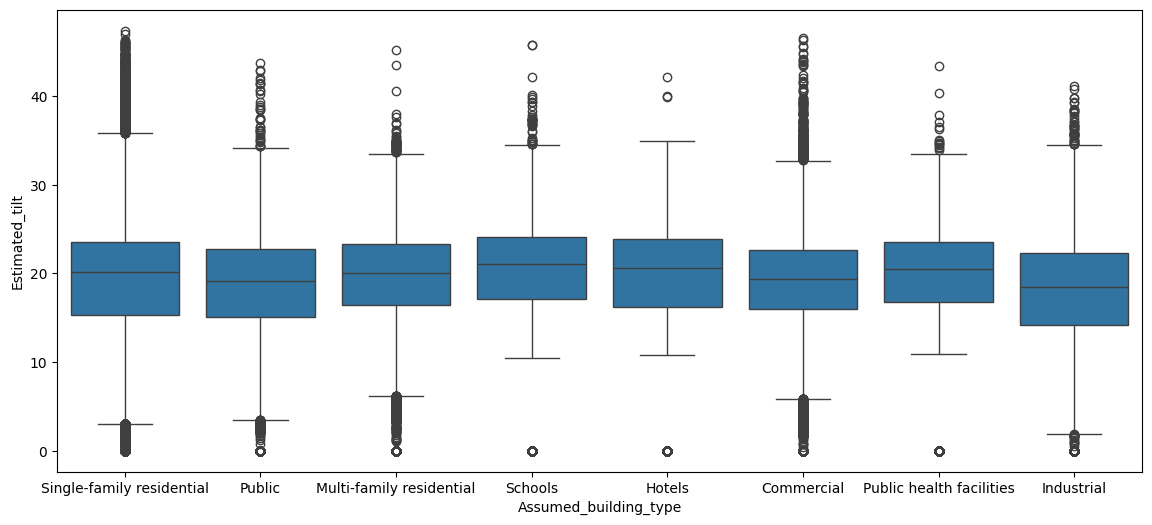

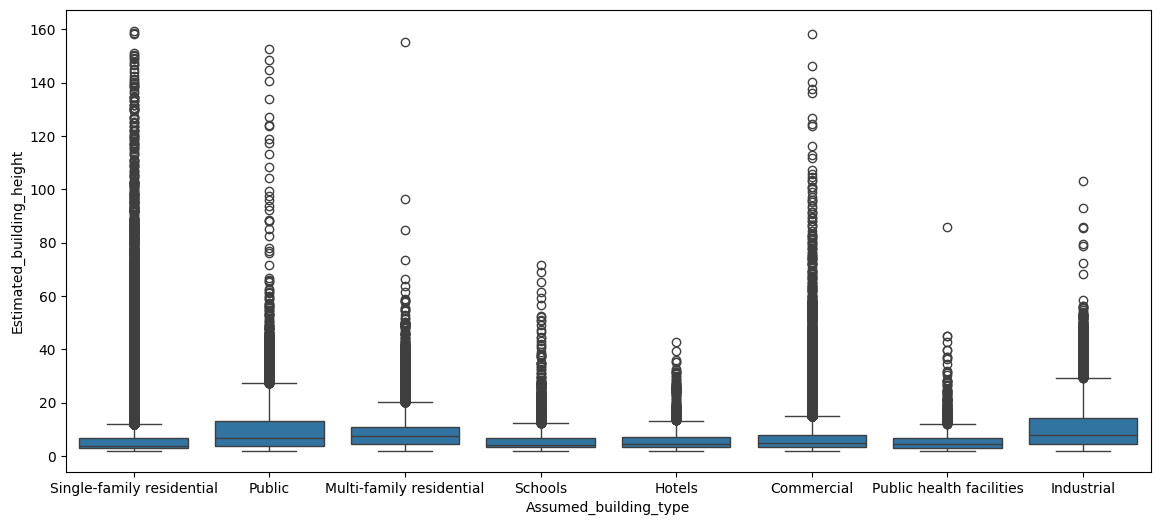

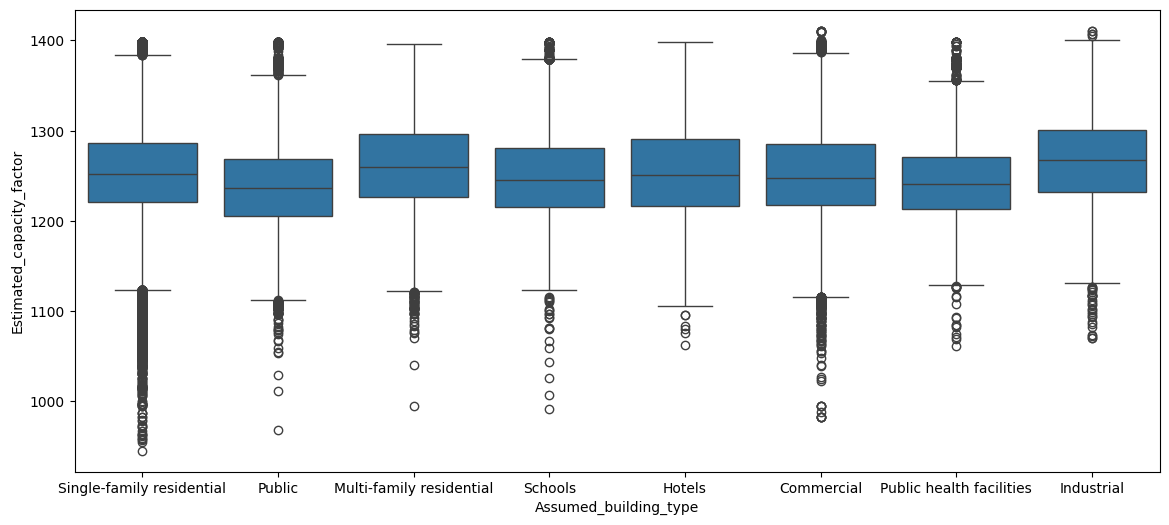

In [34]:
for i in num_col:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x = lagosstate['Assumed_building_type'], y = lagosstate[i])
    plt.show()

In [42]:
def outlier_count(col, data = num_col):

    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [43]:
for col in num_col.columns:
    outlier_count(col)


---------------Surface_area---------------

Number of outliers: 54221
Percent of data that is outlier: 3.52%

---------------Potential_installable_area---------------

Number of outliers: 88953
Percent of data that is outlier: 5.77%

---------------Peak_installable_capacity---------------

Number of outliers: 89021
Percent of data that is outlier: 5.77%

---------------Energy_potential_per_year---------------

Number of outliers: 85295
Percent of data that is outlier: 5.53%

---------------Estimated_tilt---------------

Number of outliers: 225690
Percent of data that is outlier: 14.64%


Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lagosstate['Assumed_building_type'] = le.fit_transform(lagosstate['Assumed_building_type'])

In [45]:
lagosstate['Assumed_building_type'].unique()

array([7, 4, 3, 6, 1, 0, 5, 2])

In [46]:
le.classes_

array([0, 1, 2, 3, 4, 5, 6, 7])

In [47]:
lagosstate.head(3)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,43.820000,22.990000,4.46,6226.520020,7,0.00,NaN,1396.00
1,25.020000,11.990000,2.33,2968.560059,7,27.99,NaN,1276.00
2,46.040001,24.469999,4.75,6177.589844,7,20.52,NaN,1301.52


<Axes: >

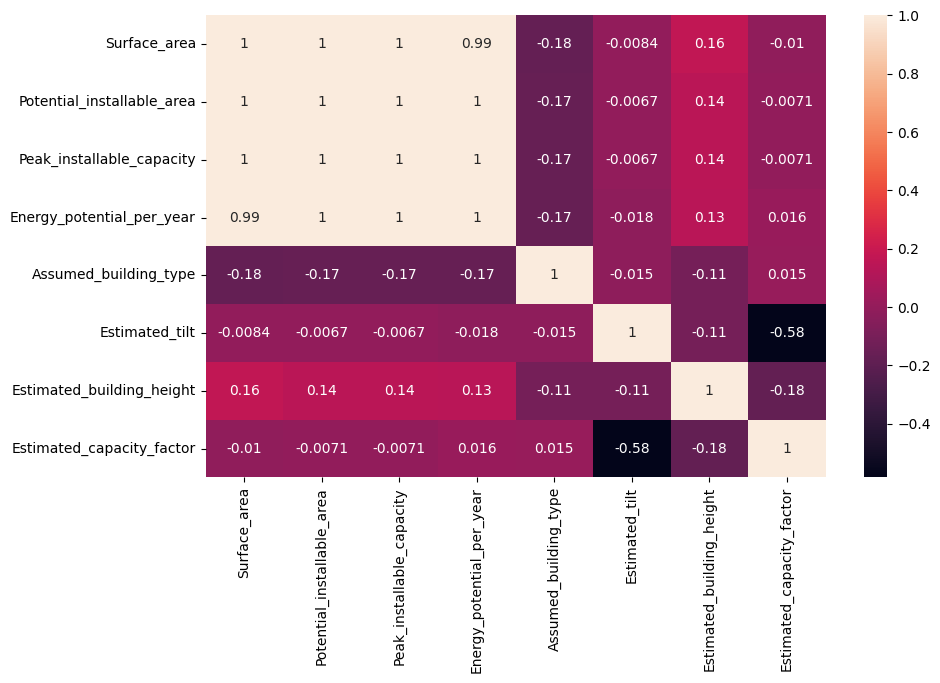

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(lagosstate.corr(), annot=True)